# Recursive feature elimination with cross-validation - sklearn

In [47]:
sklearn_results = {"clim_PTA_albers":1,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":1,
"3dem_mag1_fin":1,
"ceno_euc_aust1":1,
"be-l8-all-85m-avg-BLUE.filled.lzw.nodata":1,
"dem_fill":1,
"relief_elev_focalrange1000m_3s":1,
"LATITUDE_GRID1_clip":1,
"LOC_distance_to_coast":1,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":1,
"relief_roughness":1,
"LONGITUDE_GRID1_clip":1,
"si_geol1":1,
"3dem_mag2":1,
"Dose_2016":1,
"Clim_Prescott_LindaGregory":1,
"Potassium_2016":1,
"mrvbf_9":1,
"Rad2016K_Th":1,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":1,
"clim_RSM_albers":1,
"relief_elev_focalrange300m_3s":1,
"relief_mrvbf_3s_mosaic":1,
"saga_wetSM_85_reprojected":1,
"national_Wii_RF_multirandomforest_prediction":2,
"water-85m_3":3,
"Rad2016U_Th":4,
"tpi_300":5,
"clim_WDA_albers":6,
"s2-dpca-85m_1":7,
"be-30y-85m-avg-SWIR2.filled.lzw.nodata":8,
"water-85m_2":9,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":10,
"Thorium_2016":11,
"clim_EPA_albers":12,
"Grav_lane_clip":13,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":14,
"3dem_mag0.fin":15,
"water-85m_1":16,
"be-30y-85m-avg-RED.filled.lzw.nodata":17,
"s2-dpca-85m_2":18,
"be-30y-85m-avg-CLAY-PC2.filled.lzw.nodata":19,
"be-30y-85m-avg_BLUE+SWIR2":20,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":21,
"s2-dpca-85m_3":22,
"be-l8-all-85m-avg-NIR.filled.lzw.nodata":23,
"slope_fill2":24}

In [48]:
feature_to_drop = []
for k in sklearn_results:
    if sklearn_results[k] != 1:
        feature_to_drop.append(k)
feature_to_drop       

['national_Wii_RF_multirandomforest_prediction',
 'water-85m_3',
 'Rad2016U_Th',
 'tpi_300',
 'clim_WDA_albers',
 's2-dpca-85m_1',
 'be-30y-85m-avg-SWIR2.filled.lzw.nodata',
 'water-85m_2',
 'be-30y-85m-avg-SWIR1.filled.lzw.nodata',
 'Thorium_2016',
 'clim_EPA_albers',
 'Grav_lane_clip',
 'be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata',
 '3dem_mag0.fin',
 'water-85m_1',
 'be-30y-85m-avg-RED.filled.lzw.nodata',
 's2-dpca-85m_2',
 'be-30y-85m-avg-CLAY-PC2.filled.lzw.nodata',
 'be-30y-85m-avg_BLUE+SWIR2',
 'be-30y-85m-avg-GREEN.filled.lzw.nodata',
 's2-dpca-85m_3',
 'be-l8-all-85m-avg-NIR.filled.lzw.nodata',
 'slope_fill2']

In [51]:
input_file = Path("../data/quantile_df.csv")
df = pd.read_csv(input_file).astype('float32')
df = df.drop(feature_to_drop,axis=1)


AttributeError: 'DataFrame' object has no attribute 'coloums'

In [54]:
for a in df.columns.values:
    print(a)

target
clim_PTA_albers
be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata
3dem_mag1_fin
ceno_euc_aust1
be-l8-all-85m-avg-BLUE.filled.lzw.nodata
dem_fill
relief_elev_focalrange1000m_3s
LATITUDE_GRID1_clip
LOC_distance_to_coast
be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata
relief_roughness
LONGITUDE_GRID1_clip
si_geol1
3dem_mag2
Dose_2016
Clim_Prescott_LindaGregory
Potassium_2016
mrvbf_9
Rad2016K_Th
be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata
clim_RSM_albers
relief_elev_focalrange300m_3s
relief_mrvbf_3s_mosaic
saga_wetSM_85_reprojected


In [8]:
from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor


input_file = Path("../data/quantile_df.csv")


df = pd.read_csv(input_file).astype('float32')
df = df.drop(feature_to_drop,axis=1)

y = df['target'] 
X = df.drop("target",axis=1)
df = df[~df.isin([np.nan, np.inf, -np.inf,-9999.0]).any(1)]

model=XGBRegressor(objective='reg:squarederror', n_jobs=1)
n_splits = 3
scoring='r2'
kf = KFold(n_splits=n_splits, shuffle=True, random_state=3)
cv_scores = cross_val_score(model, X.values, y.values, cv=kf, scoring=scoring, n_jobs=3)
mean_score = np.mean(cv_scores)

print("Score: ",mean_score)

Score:  0.7663350637314866


In [34]:
# Recursive feature elimination with cross-validation - custom

In [35]:
custom_results = {
"47":{
"tpi_300":0.7732238115250757,
"Grav_lane_clip":0.7708346022022307,
"clim_PTA_albers":0.7710640187704764,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7724206177299702,
"be-30y-85m-avg_BLUE+SWIR2":0.771854892445044,
"3dem_mag1_fin":0.7692872287110896,
"ceno_euc_aust1":0.7690814287142086,
"be-l8-all-85m-avg-BLUE.filled.lzw.nodata":0.7723919213951363,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7720888826800065,
"Thorium_2016":0.7718926004941619,
"dem_fill":0.7681254270552911,
"relief_elev_focalrange1000m_3s":0.7723559694043788,
"LATITUDE_GRID1_clip":0.7714205486083429,
"LOC_distance_to_coast":0.7690240105668265,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7730718133267928,
"clim_EPA_albers":0.7721430712967021,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7701166820044977,
"relief_roughness":0.7721913208369456,
"LONGITUDE_GRID1_clip":0.764021198210295,
"si_geol1":0.7698491980993646,
"be-30y-85m-avg-SWIR2.filled.lzw.nodata":0.7723118614809102,
"national_Wii_RF_multirandomforest_prediction":0.7709025662991262,
"3dem_mag2":0.7697318432587962,
"clim_WDA_albers":0.7712201666790831,
"Dose_2016":0.7727569131022097,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.7721602939228945,
"be-30y-85m-avg-CLAY-PC2.filled.lzw.nodata":0.771890242778872,
"Clim_Prescott_LindaGregory":0.7702668811448529,
"Potassium_2016":0.7711970892417505,
"mrvbf_9":0.770272143514612,
"Rad2016K_Th":0.7717666265611758,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7703045631292623,
"be-l8-all-85m-avg-NIR.filled.lzw.nodata":0.7722907812134728,
"be-30y-85m-avg-RED.filled.lzw.nodata":0.7713778759782292,
"slope_fill2":0.7716023784337148,
"clim_RSM_albers":0.7705985211833969,
"relief_elev_focalrange300m_3s":0.7726722016675712,
"relief_mrvbf_3s_mosaic":0.771097709383684,
"Rad2016U_Th":0.7722210644801741,
"3dem_mag0.fin":0.7718074635416853,
"s2-dpca-85m_1":0.7716747966379348,
"s2-dpca-85m_2":0.7729039874779188,
"s2-dpca-85m_3":0.7714530616386187,
"water-85m_1":0.7706902126706164,
"water-85m_2":0.7712014661455715,
"water-85m_3":0.7715849894860525,
"saga_wetSM_85_reprojected":0.7718298254857902
},
"46":{
"Grav_lane_clip":0.7700531989706639,
"clim_PTA_albers":0.7708878415299871,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7710975753789344,
"be-30y-85m-avg_BLUE+SWIR2":0.7720119851692665,
"3dem_mag1_fin":0.7705763678120294,
"ceno_euc_aust1":0.7701431589738409,
"be-l8-all-85m-avg-BLUE.filled.lzw.nodata":0.772074289545101,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7710306163267377,
"Thorium_2016":0.7724476445004548,
"dem_fill":0.767931824482368,
"relief_elev_focalrange1000m_3s":0.7711575516475156,
"LATITUDE_GRID1_clip":0.7686408797370273,
"LOC_distance_to_coast":0.7692048092634715,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7720641677224968,
"clim_EPA_albers":0.7705909196036589,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7716485996372411,
"relief_roughness":0.7726469904802812,
"LONGITUDE_GRID1_clip":0.762803352320498,
"si_geol1":0.7688322742072667,
"be-30y-85m-avg-SWIR2.filled.lzw.nodata":0.771810249157121,
"national_Wii_RF_multirandomforest_prediction":0.7714048287240723,
"3dem_mag2":0.7701883095700491,
"clim_WDA_albers":0.7717498525041488,
"Dose_2016":0.7703344709800731,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.7709779552659071,
"be-30y-85m-avg-CLAY-PC2.filled.lzw.nodata":0.7727587230258114,
"Clim_Prescott_LindaGregory":0.7714824494550779,
"Potassium_2016":0.769470575876532,
"mrvbf_9":0.770739575074388,
"Rad2016K_Th":0.770804894499399,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7696845456978342,
"be-l8-all-85m-avg-NIR.filled.lzw.nodata":0.772000045843917,
"be-30y-85m-avg-RED.filled.lzw.nodata":0.7721084022078832,
"slope_fill2":0.7715108099778348,
"clim_RSM_albers":0.7711706515760834,
"relief_elev_focalrange300m_3s":0.7703189480263571,
"relief_mrvbf_3s_mosaic":0.7705310374225286,
"Rad2016U_Th":0.7721895012395227,
"3dem_mag0.fin":0.7713018511356062,
"s2-dpca-85m_1":0.7711577201598591,
"s2-dpca-85m_2":0.7720524601642285,
"s2-dpca-85m_3":0.7713060867334423,
"water-85m_1":0.7699974254426256,
"water-85m_2":0.7717162383728545,
"water-85m_3":0.7707612466106264,
"saga_wetSM_85_reprojected":0.7715014473973838
},
"45":{
"Grav_lane_clip":0.770099397348587,
"clim_PTA_albers":0.7710596305754976,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7709101412262654,
"be-30y-85m-avg_BLUE+SWIR2":0.7718609095330954,
"3dem_mag1_fin":0.7697240680149499,
"ceno_euc_aust1":0.7680634621034891,
"be-l8-all-85m-avg-BLUE.filled.lzw.nodata":0.7717420786248832,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7714019628738216,
"Thorium_2016":0.7713598879158742,
"dem_fill":0.7671331922446373,
"relief_elev_focalrange1000m_3s":0.7716250457581704,
"LATITUDE_GRID1_clip":0.771069793449278,
"LOC_distance_to_coast":0.7694296693796319,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7715102359571923,
"clim_EPA_albers":0.7727052326321124,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7711806660204946,
"relief_roughness":0.7728476935010811,
"LONGITUDE_GRID1_clip":0.7630851059498499,
"si_geol1":0.769517034973513,
"be-30y-85m-avg-SWIR2.filled.lzw.nodata":0.770588976244546,
"national_Wii_RF_multirandomforest_prediction":0.7724032900174927,
"3dem_mag2":0.7703550529371728,
"clim_WDA_albers":0.7706595540271101,
"Dose_2016":0.7718988737982233,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.7724353689312059,
"Clim_Prescott_LindaGregory":0.7689533277684305,
"Potassium_2016":0.7714958262047107,
"mrvbf_9":0.7710830496574355,
"Rad2016K_Th":0.7716784831707934,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7698165148427502,
"be-l8-all-85m-avg-NIR.filled.lzw.nodata":0.7718963453342297,
"be-30y-85m-avg-RED.filled.lzw.nodata":0.7718114770537982,
"slope_fill2":0.7713302519548858,
"clim_RSM_albers":0.7714087004399803,
"relief_elev_focalrange300m_3s":0.7707310882393209,
"relief_mrvbf_3s_mosaic":0.7700767917906384,
"Rad2016U_Th":0.7726244104822242,
"3dem_mag0.fin":0.7715560948829131,
"s2-dpca-85m_1":0.77160611150433,
"s2-dpca-85m_2":0.7716853074233899,
"s2-dpca-85m_3":0.771743576562207,
"water-85m_1":0.7711572665069903,
"water-85m_2":0.771294708558046,
"water-85m_3":0.7713035717543185,
"saga_wetSM_85_reprojected":0.7707337606236563
},
"44":{
"Grav_lane_clip":0.770477116596207,
"clim_PTA_albers":0.7715505228994467,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7724313356806398,
"be-30y-85m-avg_BLUE+SWIR2":0.7719031144762124,
"3dem_mag1_fin":0.7709671656162365,
"ceno_euc_aust1":0.7709518815570925,
"be-l8-all-85m-avg-BLUE.filled.lzw.nodata":0.772139104197494,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7717504456575948,
"Thorium_2016":0.7721387696046369,
"dem_fill":0.7667487049794149,
"relief_elev_focalrange1000m_3s":0.7712745431753598,
"LATITUDE_GRID1_clip":0.770308311909384,
"LOC_distance_to_coast":0.769994646698834,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7721253985572037,
"clim_EPA_albers":0.7721938405008957,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7707031853120249,
"LONGITUDE_GRID1_clip":0.7644422248056372,
"si_geol1":0.7689188351825716,
"be-30y-85m-avg-SWIR2.filled.lzw.nodata":0.7711191987022397,
"national_Wii_RF_multirandomforest_prediction":0.7723710247493627,
"3dem_mag2":0.7708779982442883,
"clim_WDA_albers":0.7698798670124773,
"Dose_2016":0.7713746882382223,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.771478176115592,
"Clim_Prescott_LindaGregory":0.7699869820292955,
"Potassium_2016":0.7696902632604523,
"mrvbf_9":0.7703078289679833,
"Rad2016K_Th":0.770318142705286,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7696115128443299,
"be-l8-all-85m-avg-NIR.filled.lzw.nodata":0.7728359305080109,
"be-30y-85m-avg-RED.filled.lzw.nodata":0.772367764790812,
"slope_fill2":0.7715835165537476,
"clim_RSM_albers":0.7707175092047085,
"relief_elev_focalrange300m_3s":0.7703852306970757,
"relief_mrvbf_3s_mosaic":0.772417697781335,
"Rad2016U_Th":0.7727575543028027,
"3dem_mag0.fin":0.7713231178888442,
"s2-dpca-85m_1":0.772111977840581,
"s2-dpca-85m_2":0.7732267105237857,
"s2-dpca-85m_3":0.7722963982505923,
"water-85m_1":0.7732443777932477,
"water-85m_2":0.7717731391169935,
"water-85m_3":0.771575848349416,
"saga_wetSM_85_reprojected":0.7716269247045621
},
"43":{
"Grav_lane_clip":0.7697284519212917,
"clim_PTA_albers":0.7718728842821897,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7706965476876327,
"be-30y-85m-avg_BLUE+SWIR2":0.7719587604550112,
"3dem_mag1_fin":0.7703391652536729,
"ceno_euc_aust1":0.7707853570719502,
"be-l8-all-85m-avg-BLUE.filled.lzw.nodata":0.7722076873229339,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7717853254776514,
"Thorium_2016":0.7717215876601268,
"dem_fill":0.7677859199163701,
"relief_elev_focalrange1000m_3s":0.7709354654676149,
"LATITUDE_GRID1_clip":0.7708472805761978,
"LOC_distance_to_coast":0.7699216781681035,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7722290419170901,
"clim_EPA_albers":0.7720313344545416,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7707986125546592,
"LONGITUDE_GRID1_clip":0.7631799406106063,
"si_geol1":0.7694590079942386,
"be-30y-85m-avg-SWIR2.filled.lzw.nodata":0.7727178393555739,
"national_Wii_RF_multirandomforest_prediction":0.7715324616360567,
"3dem_mag2":0.770141994500294,
"clim_WDA_albers":0.7711155962286576,
"Dose_2016":0.7725979061556485,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.7717179506312802,
"Clim_Prescott_LindaGregory":0.7697844464271982,
"Potassium_2016":0.7705629320558453,
"mrvbf_9":0.7721601562302808,
"Rad2016K_Th":0.7712517165898234,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7703798521912898,
"be-l8-all-85m-avg-NIR.filled.lzw.nodata":0.7722647062020043,
"be-30y-85m-avg-RED.filled.lzw.nodata":0.7722438224230014,
"slope_fill2":0.7720954023173615,
"clim_RSM_albers":0.7701828336569972,
"relief_elev_focalrange300m_3s":0.77042794296222,
"relief_mrvbf_3s_mosaic":0.7711771414546701,
"Rad2016U_Th":0.772013857398323,
"3dem_mag0.fin":0.7715315008471704,
"s2-dpca-85m_1":0.7721700902017233,
"s2-dpca-85m_2":0.7715078185935184,
"s2-dpca-85m_3":0.7725921895087392,
"water-85m_2":0.772297408390959,
"water-85m_3":0.7720411224961258,
"saga_wetSM_85_reprojected":0.7722501002944222
},
"42":{
"Grav_lane_clip":0.7704409756226204,
"clim_PTA_albers":0.77113028385989,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7711709623750664,
"be-30y-85m-avg_BLUE+SWIR2":0.7715313595410036,
"3dem_mag1_fin":0.7699821366145531,
"ceno_euc_aust1":0.7693911900006958,
"be-l8-all-85m-avg-BLUE.filled.lzw.nodata":0.772504770507743,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7711313039292861,
"Thorium_2016":0.7711893997122846,
"dem_fill":0.7665910498361538,
"relief_elev_focalrange1000m_3s":0.7716363771904134,
"LATITUDE_GRID1_clip":0.7697915776652211,
"LOC_distance_to_coast":0.7689231815585451,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7733252053965213,
"clim_EPA_albers":0.7712080374916325,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7706515614711323,
"LONGITUDE_GRID1_clip":0.7643983178500392,
"si_geol1":0.769878792754571,
"national_Wii_RF_multirandomforest_prediction":0.7724258267496729,
"3dem_mag2":0.7702110956362086,
"clim_WDA_albers":0.7717008928097462,
"Dose_2016":0.7718515471125899,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.7729774191320303,
"Clim_Prescott_LindaGregory":0.7692764621490896,
"Potassium_2016":0.7713672678389681,
"mrvbf_9":0.7702753423752128,
"Rad2016K_Th":0.7712771272807509,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7709992769269246,
"be-l8-all-85m-avg-NIR.filled.lzw.nodata":0.7716820063112166,
"be-30y-85m-avg-RED.filled.lzw.nodata":0.7715565241756713,
"slope_fill2":0.7728252218858694,
"clim_RSM_albers":0.770849704623993,
"relief_elev_focalrange300m_3s":0.7702099157016479,
"relief_mrvbf_3s_mosaic":0.7709211967742798,
"Rad2016U_Th":0.7728418264167747,
"3dem_mag0.fin":0.7701459955266312,
"s2-dpca-85m_1":0.7714976655656057,
"s2-dpca-85m_2":0.7715750985233019,
"s2-dpca-85m_3":0.7735287102187711,
"water-85m_2":0.7723081880416798,
"water-85m_3":0.7720379719832243,
"saga_wetSM_85_reprojected":0.7711088846685833
},
"41":{
"Grav_lane_clip":0.7708724480740012,
"clim_PTA_albers":0.7712813323572205,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7715309597462815,
"be-30y-85m-avg_BLUE+SWIR2":0.7711640402849959,
"3dem_mag1_fin":0.7707705086270261,
"ceno_euc_aust1":0.7706062169482544,
"be-l8-all-85m-avg-BLUE.filled.lzw.nodata":0.7740463317118039,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7714500579985574,
"Thorium_2016":0.7724179384985005,
"dem_fill":0.7670412788019773,
"relief_elev_focalrange1000m_3s":0.7704964580814623,
"LATITUDE_GRID1_clip":0.7719027437570775,
"LOC_distance_to_coast":0.7687301841514224,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7725475615063869,
"clim_EPA_albers":0.7707908892686727,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7684989856546355,
"LONGITUDE_GRID1_clip":0.7635096177854616,
"si_geol1":0.7701032625746866,
"national_Wii_RF_multirandomforest_prediction":0.7720756906289362,
"3dem_mag2":0.7696148061378493,
"clim_WDA_albers":0.7717229402737353,
"Dose_2016":0.7735455396171979,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.7733689687552546,
"Clim_Prescott_LindaGregory":0.7704942738201073,
"Potassium_2016":0.771107706368694,
"mrvbf_9":0.7720527349710621,
"Rad2016K_Th":0.7712210408148121,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7704999743936755,
"be-l8-all-85m-avg-NIR.filled.lzw.nodata":0.7716435088227152,
"be-30y-85m-avg-RED.filled.lzw.nodata":0.772499754680577,
"slope_fill2":0.7709837753312057,
"clim_RSM_albers":0.771728697879189,
"relief_elev_focalrange300m_3s":0.7715173474448389,
"relief_mrvbf_3s_mosaic":0.7719280929085676,
"Rad2016U_Th":0.772294839854682,
"3dem_mag0.fin":0.7720373905785983,
"s2-dpca-85m_1":0.772358880280226,
"s2-dpca-85m_2":0.771660635954975,
"water-85m_2":0.7715059645890848,
"water-85m_3":0.77240807454977,
"saga_wetSM_85_reprojected":0.7727824391364124
},
"40":{
"Grav_lane_clip":0.7720263582715617,
"clim_PTA_albers":0.770043704915461,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.771917119432815,
"be-30y-85m-avg_BLUE+SWIR2":0.77343422177244,
"3dem_mag1_fin":0.7699362064236758,
"ceno_euc_aust1":0.7703290957913941,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7724312797015337,
"Thorium_2016":0.7726593650985283,
"dem_fill":0.7685998532269963,
"relief_elev_focalrange1000m_3s":0.7709843527451447,
"LATITUDE_GRID1_clip":0.7692413890374077,
"LOC_distance_to_coast":0.7714359498822757,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7709169672325856,
"clim_EPA_albers":0.7731925607021966,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7706470203535144,
"LONGITUDE_GRID1_clip":0.7656760214809575,
"si_geol1":0.7709154477994659,
"national_Wii_RF_multirandomforest_prediction":0.7730680620164345,
"3dem_mag2":0.770110892505742,
"clim_WDA_albers":0.7716737367498844,
"Dose_2016":0.7726760803354726,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.7724830910264106,
"Clim_Prescott_LindaGregory":0.770683208461557,
"Potassium_2016":0.7704084444900389,
"mrvbf_9":0.7715147270361294,
"Rad2016K_Th":0.7709411561140455,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7716970757339218,
"be-l8-all-85m-avg-NIR.filled.lzw.nodata":0.7718285537724227,
"be-30y-85m-avg-RED.filled.lzw.nodata":0.7733893598011332,
"slope_fill2":0.772092745130205,
"clim_RSM_albers":0.7727247412132083,
"relief_elev_focalrange300m_3s":0.7733851137898036,
"relief_mrvbf_3s_mosaic":0.7716685112980034,
"Rad2016U_Th":0.772971552356343,
"3dem_mag0.fin":0.7733371280879503,
"s2-dpca-85m_1":0.7727452628567778,
"s2-dpca-85m_2":0.7731702463784536,
"water-85m_2":0.7728432581484984,
"water-85m_3":0.7718608560873994,
"saga_wetSM_85_reprojected":0.7727536567825263
},
"39":{
"Grav_lane_clip":0.7716135551781292,
"clim_PTA_albers":0.77222616609592,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7713719021907733,
"3dem_mag1_fin":0.7711758129642933,
"ceno_euc_aust1":0.7720729003506118,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7731802647378098,
"Thorium_2016":0.7716050646147211,
"dem_fill":0.7692404010812908,
"relief_elev_focalrange1000m_3s":0.7713605218314618,
"LATITUDE_GRID1_clip":0.7708570807475738,
"LOC_distance_to_coast":0.7693213856635964,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7732951915669095,
"clim_EPA_albers":0.7714836751268881,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7717546526443687,
"LONGITUDE_GRID1_clip":0.7666667203391119,
"si_geol1":0.7714939091536395,
"national_Wii_RF_multirandomforest_prediction":0.7736788922667034,
"3dem_mag2":0.7708886264369209,
"clim_WDA_albers":0.7721041436706194,
"Dose_2016":0.7729017133714202,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.7730858023388465,
"Clim_Prescott_LindaGregory":0.7693204671567203,
"Potassium_2016":0.7710069590982255,
"mrvbf_9":0.7714423126416684,
"Rad2016K_Th":0.7721719538142043,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7708291574085081,
"be-l8-all-85m-avg-NIR.filled.lzw.nodata":0.7734222145946305,
"be-30y-85m-avg-RED.filled.lzw.nodata":0.7730886223434544,
"slope_fill2":0.7739807850015069,
"clim_RSM_albers":0.7716518929998558,
"relief_elev_focalrange300m_3s":0.7728456844182022,
"relief_mrvbf_3s_mosaic":0.7713632283100598,
"Rad2016U_Th":0.7731499146129407,
"3dem_mag0.fin":0.7728322837313314,
"s2-dpca-85m_1":0.7727088522806159,
"s2-dpca-85m_2":0.772737824087578,
"water-85m_2":0.7728258993734786,
"water-85m_3":0.7720850623837343,
"saga_wetSM_85_reprojected":0.7733855936904005
},
"38":{
"Grav_lane_clip":0.7715344157932048,
"clim_PTA_albers":0.7718857192068412,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7731130040911612,
"3dem_mag1_fin":0.7719284893879439,
"ceno_euc_aust1":0.7717574036993353,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7724680318362881,
"Thorium_2016":0.7725711771485083,
"dem_fill":0.7686195409415717,
"relief_elev_focalrange1000m_3s":0.7721169688658692,
"LATITUDE_GRID1_clip":0.7712093262252191,
"LOC_distance_to_coast":0.7705142397078498,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7718652999286189,
"clim_EPA_albers":0.7719354263073003,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7726004345906586,
"LONGITUDE_GRID1_clip":0.765587866214786,
"si_geol1":0.7726539252515746,
"national_Wii_RF_multirandomforest_prediction":0.7729043786159403,
"3dem_mag2":0.7725810980527129,
"clim_WDA_albers":0.7725107943116633,
"Dose_2016":0.7721487248129247,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.7741496839204117,
"Clim_Prescott_LindaGregory":0.7711175463710184,
"Potassium_2016":0.7703576119939773,
"mrvbf_9":0.7731363614809625,
"Rad2016K_Th":0.7727716284195582,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7718728502165302,
"be-l8-all-85m-avg-NIR.filled.lzw.nodata":0.7748595678618129,
"be-30y-85m-avg-RED.filled.lzw.nodata":0.7725949280504983,
"clim_RSM_albers":0.7723440471550838,
"relief_elev_focalrange300m_3s":0.7720426435381951,
"relief_mrvbf_3s_mosaic":0.7728137090077354,
"Rad2016U_Th":0.7728186999791511,
"3dem_mag0.fin":0.7730716700229237,
"s2-dpca-85m_1":0.771609301977529,
"s2-dpca-85m_2":0.7732122815978815,
"water-85m_2":0.7731607010160628,
"water-85m_3":0.7731410272657593,
"saga_wetSM_85_reprojected":0.7726513161083357
},
"37":{
"Grav_lane_clip":0.7716454731842051,
"clim_PTA_albers":0.7732406203208871,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7738094140504765,
"3dem_mag1_fin":0.7726959882493913,
"ceno_euc_aust1":0.7706165935171362,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7730512322784534,
"Thorium_2016":0.7729449455684215,
"dem_fill":0.7697703348718011,
"relief_elev_focalrange1000m_3s":0.7720422246079625,
"LATITUDE_GRID1_clip":0.7705287487279721,
"LOC_distance_to_coast":0.7708646826459953,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7732837427155289,
"clim_EPA_albers":0.7723896082771212,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7718513040229876,
"LONGITUDE_GRID1_clip":0.7672676667072157,
"si_geol1":0.7717143149553577,
"national_Wii_RF_multirandomforest_prediction":0.7730713620463536,
"3dem_mag2":0.7710139754014609,
"clim_WDA_albers":0.7719374904496092,
"Dose_2016":0.7721141400653537,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.7736853176422113,
"Clim_Prescott_LindaGregory":0.7711879464317137,
"Potassium_2016":0.7722025249151626,
"mrvbf_9":0.7730235736397676,
"Rad2016K_Th":0.7719434890298781,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7721555015871889,
"be-30y-85m-avg-RED.filled.lzw.nodata":0.774100619242064,
"clim_RSM_albers":0.7725123547711154,
"relief_elev_focalrange300m_3s":0.7733841747607862,
"relief_mrvbf_3s_mosaic":0.7732814781265803,
"Rad2016U_Th":0.772825798448569,
"3dem_mag0.fin":0.7729267569126645,
"s2-dpca-85m_1":0.7732699244191741,
"s2-dpca-85m_2":0.7739160981730627,
"water-85m_2":0.7725061545898297,
"water-85m_3":0.7728349761054224,
"saga_wetSM_85_reprojected":0.772182484535067
},
"36":{
"Grav_lane_clip":0.7714479275252527,
"clim_PTA_albers":0.7731418684086621,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7728431160055925,
"3dem_mag1_fin":0.7725054365176627,
"ceno_euc_aust1":0.7717955295345457,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7728837443076536,
"Thorium_2016":0.7734147164775257,
"dem_fill":0.7692095697212892,
"relief_elev_focalrange1000m_3s":0.77191080195598,
"LATITUDE_GRID1_clip":0.7720472953479215,
"LOC_distance_to_coast":0.7720265813036417,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7724103831745577,
"clim_EPA_albers":0.7721325469074634,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7723666564872703,
"LONGITUDE_GRID1_clip":0.7674030718173257,
"si_geol1":0.7708612704628113,
"national_Wii_RF_multirandomforest_prediction":0.774894243937502,
"3dem_mag2":0.7720081526444047,
"clim_WDA_albers":0.771927904767304,
"Dose_2016":0.7720771953717942,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.7735209077556585,
"Clim_Prescott_LindaGregory":0.771136410634809,
"Potassium_2016":0.771684149646681,
"mrvbf_9":0.7714390181033776,
"Rad2016K_Th":0.773649588854119,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7705761929106189,
"clim_RSM_albers":0.7727903492037668,
"relief_elev_focalrange300m_3s":0.7733772938536448,
"relief_mrvbf_3s_mosaic":0.7735732750834589,
"Rad2016U_Th":0.7736340693497136,
"3dem_mag0.fin":0.7739914879761033,
"s2-dpca-85m_1":0.7729330809569638,
"s2-dpca-85m_2":0.7741751745078375,
"water-85m_2":0.7743311610641571,
"water-85m_3":0.7735465375113854,
"saga_wetSM_85_reprojected":0.7732360183970668
},
"35":{
"Grav_lane_clip":0.7721648778297366,
"clim_PTA_albers":0.7733296011203473,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7732277581191892,
"3dem_mag1_fin":0.771243821131698,
"ceno_euc_aust1":0.7734861058547157,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7735206789532275,
"Thorium_2016":0.7727579847634809,
"dem_fill":0.7694028247766864,
"relief_elev_focalrange1000m_3s":0.7721014448808449,
"LATITUDE_GRID1_clip":0.7731702929429559,
"LOC_distance_to_coast":0.7714826734355507,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.7735407551568673,
"clim_EPA_albers":0.7743798351789041,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.773799355639543,
"LONGITUDE_GRID1_clip":0.7653026401792505,
"si_geol1":0.7720445293100028,
"3dem_mag2":0.7711942778475819,
"clim_WDA_albers":0.7724317694142426,
"Dose_2016":0.772005651186816,
"be-30y-85m-avg-GREEN.filled.lzw.nodata":0.775131200382238,
"Clim_Prescott_LindaGregory":0.7716836866656472,
"Potassium_2016":0.7721373764111364,
"mrvbf_9":0.772380087948032,
"Rad2016K_Th":0.7719900661611142,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7720685808122582,
"clim_RSM_albers":0.773356722185741,
"relief_elev_focalrange300m_3s":0.7731846731743851,
"relief_mrvbf_3s_mosaic":0.7729838446796505,
"Rad2016U_Th":0.7743976813768475,
"3dem_mag0.fin":0.7732561663200012,
"s2-dpca-85m_1":0.7727383169997304,
"s2-dpca-85m_2":0.7744443552304406,
"water-85m_2":0.7735856106561254,
"water-85m_3":0.7725214404451833,
"saga_wetSM_85_reprojected":0.7737983908539817
},
"34":{
"Grav_lane_clip":0.7726287849658586,
"clim_PTA_albers":0.7732412338874027,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.773778444411854,
"3dem_mag1_fin":0.7731404727587995,
"ceno_euc_aust1":0.7723942644114795,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7739239431957735,
"Thorium_2016":0.7744426085228645,
"dem_fill":0.7691239530297939,
"relief_elev_focalrange1000m_3s":0.7722922258595842,
"LATITUDE_GRID1_clip":0.7722089412782468,
"LOC_distance_to_coast":0.7709187619391975,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.77348620851537,
"clim_EPA_albers":0.7736443753875353,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7729173693160227,
"LONGITUDE_GRID1_clip":0.7679726624628359,
"si_geol1":0.7725612666487981,
"3dem_mag2":0.7708362467379369,
"clim_WDA_albers":0.7731596596431292,
"Dose_2016":0.7721287971389804,
"Clim_Prescott_LindaGregory":0.7720845615934652,
"Potassium_2016":0.7714796603948687,
"mrvbf_9":0.773373518091219,
"Rad2016K_Th":0.7725558721034499,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7727265737293584,
"clim_RSM_albers":0.7728155567568998,
"relief_elev_focalrange300m_3s":0.7732335598125081,
"relief_mrvbf_3s_mosaic":0.7748660859310622,
"Rad2016U_Th":0.7737393018795586,
"3dem_mag0.fin":0.7728196921898727,
"s2-dpca-85m_1":0.773703230502031,
"s2-dpca-85m_2":0.7740969935152845,
"water-85m_2":0.7741455435713007,
"water-85m_3":0.7745699638184412,
"saga_wetSM_85_reprojected":0.7738732381503551
},
"33":{
"Grav_lane_clip":0.7726162488315277,
"clim_PTA_albers":0.7735305987459568,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7735913547819928,
"3dem_mag1_fin":0.7725300800665956,
"ceno_euc_aust1":0.7719663799717614,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.775075685075711,
"Thorium_2016":0.77426437349075,
"dem_fill":0.7698021463445966,
"relief_elev_focalrange1000m_3s":0.771704692901222,
"LATITUDE_GRID1_clip":0.77103031815837,
"LOC_distance_to_coast":0.7720017282039172,
"be-30y-85m-avg-SWIR1.filled.lzw.nodata":0.775501532983637,
"clim_EPA_albers":0.7743213394260499,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.773248904598466,
"LONGITUDE_GRID1_clip":0.7674678163349343,
"si_geol1":0.7724558432554409,
"3dem_mag2":0.7736541393472732,
"clim_WDA_albers":0.7739212896645157,
"Dose_2016":0.7730445260436382,
"Clim_Prescott_LindaGregory":0.7728257568284637,
"Potassium_2016":0.7713254398556004,
"mrvbf_9":0.7727062558622717,
"Rad2016K_Th":0.7724591637914818,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.773222645885555,
"clim_RSM_albers":0.7730461478213463,
"relief_elev_focalrange300m_3s":0.7745300681429432,
"Rad2016U_Th":0.7747569281260785,
"3dem_mag0.fin":0.7739170317946852,
"s2-dpca-85m_1":0.7735164558915305,
"s2-dpca-85m_2":0.7754110876926358,
"water-85m_2":0.7736859283800417,
"water-85m_3":0.7751096447654113,
"saga_wetSM_85_reprojected":0.7745501505394187
},
"32":{
"Grav_lane_clip":0.7713820029195677,
"clim_PTA_albers":0.7726337788593414,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7743481114959456,
"3dem_mag1_fin":0.7721982865893698,
"ceno_euc_aust1":0.7722336149875663,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7750377956530633,
"Thorium_2016":0.7727092909093208,
"dem_fill":0.7686873555080193,
"relief_elev_focalrange1000m_3s":0.7714344871022258,
"LATITUDE_GRID1_clip":0.7728870916809537,
"LOC_distance_to_coast":0.7717188098771711,
"clim_EPA_albers":0.7735370058747834,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7730572935382142,
"LONGITUDE_GRID1_clip":0.7663611201328498,
"si_geol1":0.7726519161643807,
"3dem_mag2":0.7732060303620308,
"clim_WDA_albers":0.7742594898510337,
"Dose_2016":0.7741398637133304,
"Clim_Prescott_LindaGregory":0.7724535065650234,
"Potassium_2016":0.7714020723316825,
"mrvbf_9":0.7732925248025007,
"Rad2016K_Th":0.7732540220886595,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7715687041541129,
"clim_RSM_albers":0.7727676686186284,
"relief_elev_focalrange300m_3s":0.7737868470800714,
"Rad2016U_Th":0.7745279482081052,
"3dem_mag0.fin":0.7727749059701629,
"s2-dpca-85m_1":0.7721198281632717,
"s2-dpca-85m_2":0.7751923472763723,
"water-85m_2":0.7736773958991595,
"water-85m_3":0.7734577141628111,
"saga_wetSM_85_reprojected":0.7730797179899902
},
"31":{
"Grav_lane_clip":0.7733790085761972,
"clim_PTA_albers":0.7738509468856684,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7742316970019169,
"3dem_mag1_fin":0.7725291214561426,
"ceno_euc_aust1":0.7734390397316174,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7737710508214279,
"Thorium_2016":0.7746498525018543,
"dem_fill":0.7697250452100762,
"relief_elev_focalrange1000m_3s":0.7725567023421359,
"LATITUDE_GRID1_clip":0.7729356995194956,
"LOC_distance_to_coast":0.7722634910737899,
"clim_EPA_albers":0.7743531772318013,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7743165258141115,
"LONGITUDE_GRID1_clip":0.7671753920379073,
"si_geol1":0.7724590860247499,
"3dem_mag2":0.7725297729060072,
"clim_WDA_albers":0.7743393617742712,
"Dose_2016":0.7750254946200847,
"Clim_Prescott_LindaGregory":0.7716518582960384,
"Potassium_2016":0.7729162225695635,
"mrvbf_9":0.773040863904939,
"Rad2016K_Th":0.7737758163272707,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7728874034717537,
"clim_RSM_albers":0.7750731163323595,
"relief_elev_focalrange300m_3s":0.7748027620815293,
"Rad2016U_Th":0.7753375159687721,
"3dem_mag0.fin":0.7742044406353058,
"s2-dpca-85m_1":0.7742112488740295,
"water-85m_2":0.7738560552160801,
"water-85m_3":0.7741277896231292,
"saga_wetSM_85_reprojected":0.774209675672655
},
"30":{
"Grav_lane_clip":0.7730981784967669,
"clim_PTA_albers":0.7738169911557932,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7760706988319943,
"3dem_mag1_fin":0.7741782141819392,
"ceno_euc_aust1":0.7739792305227992,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7739661296173207,
"Thorium_2016":0.7757704035662972,
"dem_fill":0.771248644846341,
"relief_elev_focalrange1000m_3s":0.7738584489971466,
"LATITUDE_GRID1_clip":0.7734366115219174,
"LOC_distance_to_coast":0.7732028409896499,
"clim_EPA_albers":0.7755905624689688,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7741475663664934,
"LONGITUDE_GRID1_clip":0.7673613025560396,
"si_geol1":0.7735478069414677,
"3dem_mag2":0.7746959834946582,
"clim_WDA_albers":0.7743747867642196,
"Dose_2016":0.7751392049597712,
"Clim_Prescott_LindaGregory":0.7730292399410321,
"Potassium_2016":0.7739813369582128,
"mrvbf_9":0.7736499597034076,
"Rad2016K_Th":0.7747864959112855,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7731283322889851,
"clim_RSM_albers":0.7750931369765647,
"relief_elev_focalrange300m_3s":0.7747198890814846,
"3dem_mag0.fin":0.7747186898110985,
"s2-dpca-85m_1":0.7757641250427499,
"water-85m_2":0.7765012350056345,
"water-85m_3":0.7748207348343464,
"saga_wetSM_85_reprojected":0.7750084234859181
},
"29":{
"Grav_lane_clip":0.7742974283142686,
"clim_PTA_albers":0.7746859731262897,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.774328627891285,
"3dem_mag1_fin":0.7742820894013276,
"ceno_euc_aust1":0.773897149231785,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7749879649585062,
"Thorium_2016":0.7747709145050065,
"dem_fill":0.772026125785696,
"relief_elev_focalrange1000m_3s":0.7735770494105966,
"LATITUDE_GRID1_clip":0.7743129172864537,
"LOC_distance_to_coast":0.7738059654821233,
"clim_EPA_albers":0.7750347374434746,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7756994619448255,
"LONGITUDE_GRID1_clip":0.7681077150687479,
"si_geol1":0.7747308423395572,
"3dem_mag2":0.775553486002016,
"clim_WDA_albers":0.775805793914771,
"Dose_2016":0.7761822136376192,
"Clim_Prescott_LindaGregory":0.7727661387724516,
"Potassium_2016":0.7749493226073101,
"mrvbf_9":0.7740853977150078,
"Rad2016K_Th":0.7753339074921524,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7736544620242484,
"clim_RSM_albers":0.774057070343633,
"relief_elev_focalrange300m_3s":0.7776374019324361,
"3dem_mag0.fin":0.7751935789921373,
"s2-dpca-85m_1":0.7754517227728996,
"water-85m_3":0.7756636224479628,
"saga_wetSM_85_reprojected":0.7760136907284859
},
"28":{
"Grav_lane_clip":0.7744959254483348,
"clim_PTA_albers":0.7736421828693051,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7750846345114696,
"3dem_mag1_fin":0.7755638248829805,
"ceno_euc_aust1":0.7749204635704888,
"be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata":0.7766324971790158,
"Thorium_2016":0.7761314614066227,
"dem_fill":0.7719596671311096,
"relief_elev_focalrange1000m_3s":0.7740711171605898,
"LATITUDE_GRID1_clip":0.774112598568085,
"LOC_distance_to_coast":0.7741032262382791,
"clim_EPA_albers":0.7752478552794541,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7739387321279078,
"LONGITUDE_GRID1_clip":0.769585276477789,
"si_geol1":0.7748412259645598,
"3dem_mag2":0.7738547664337222,
"clim_WDA_albers":0.7759049365902356,
"Dose_2016":0.7752903648285002,
"Clim_Prescott_LindaGregory":0.774829342615745,
"Potassium_2016":0.7734631520787568,
"mrvbf_9":0.775388571781531,
"Rad2016K_Th":0.775601961183111,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7738349220234398,
"clim_RSM_albers":0.7758733276364057,
"3dem_mag0.fin":0.7740323405972985,
"s2-dpca-85m_1":0.7761216996375756,
"water-85m_3":0.7765415187763881,
"saga_wetSM_85_reprojected":0.7756910343188043
},
"27":{
"Grav_lane_clip":0.7745148789419338,
"clim_PTA_albers":0.7758209169663367,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7744570436222533,
"3dem_mag1_fin":0.7736281578976003,
"ceno_euc_aust1":0.7741605718235699,
"Thorium_2016":0.7753464358070961,
"dem_fill":0.7714164408259716,
"relief_elev_focalrange1000m_3s":0.7731611412911729,
"LATITUDE_GRID1_clip":0.7727530676523792,
"LOC_distance_to_coast":0.7736231897263394,
"clim_EPA_albers":0.7753379888349333,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.773568731587766,
"LONGITUDE_GRID1_clip":0.767475535201421,
"si_geol1":0.7752053391861106,
"3dem_mag2":0.7747609190488406,
"clim_WDA_albers":0.7756652114404258,
"Dose_2016":0.7750006327775364,
"Clim_Prescott_LindaGregory":0.7733344649886553,
"Potassium_2016":0.7740848335999472,
"mrvbf_9":0.7745960877778947,
"Rad2016K_Th":0.7745682951074775,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7740337364955553,
"clim_RSM_albers":0.7756214806611313,
"3dem_mag0.fin":0.7749882127088089,
"s2-dpca-85m_1":0.7756778541037977,
"water-85m_3":0.775567118531327,
"saga_wetSM_85_reprojected":0.7756167184273015
},
"26":{
"Grav_lane_clip":0.7723081713082512,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7739007986662371,
"3dem_mag1_fin":0.7740953705758082,
"ceno_euc_aust1":0.7734664286628378,
"Thorium_2016":0.7753303363800671,
"dem_fill":0.7699679358191839,
"relief_elev_focalrange1000m_3s":0.7730891408437843,
"LATITUDE_GRID1_clip":0.7727851021533575,
"LOC_distance_to_coast":0.7713666943894418,
"clim_EPA_albers":0.7737195807309146,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.77312451568392,
"LONGITUDE_GRID1_clip":0.766196553675402,
"si_geol1":0.7730380131911273,
"3dem_mag2":0.7735633220295396,
"clim_WDA_albers":0.7731876052031085,
"Dose_2016":0.7748569035200498,
"Clim_Prescott_LindaGregory":0.7732595914839598,
"Potassium_2016":0.7733259641805373,
"mrvbf_9":0.7728457447574812,
"Rad2016K_Th":0.7739182460628831,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7749540236437967,
"clim_RSM_albers":0.7744806199627657,
"3dem_mag0.fin":0.7742962450071113,
"s2-dpca-85m_1":0.7743355338319592,
"water-85m_3":0.7748791416547224,
"saga_wetSM_85_reprojected":0.7745065457916125
},
"25":{
"Grav_lane_clip":0.7714411959818754,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7750454458422009,
"3dem_mag1_fin":0.7729564450083508,
"ceno_euc_aust1":0.7730045570778387,
"dem_fill":0.7712414791517171,
"relief_elev_focalrange1000m_3s":0.7731541187602259,
"LATITUDE_GRID1_clip":0.7719339686200977,
"LOC_distance_to_coast":0.7735438377142799,
"clim_EPA_albers":0.7724422367820347,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7746928560692382,
"LONGITUDE_GRID1_clip":0.7663360173190407,
"si_geol1":0.771784819731688,
"3dem_mag2":0.7723776304201785,
"clim_WDA_albers":0.7745090276018286,
"Dose_2016":0.7732673948111813,
"Clim_Prescott_LindaGregory":0.7727005025324081,
"Potassium_2016":0.7728130437116958,
"mrvbf_9":0.7748225740326307,
"Rad2016K_Th":0.7747678372327188,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7742961327273408,
"clim_RSM_albers":0.7755767476161269,
"3dem_mag0.fin":0.775073622870762,
"s2-dpca-85m_1":0.7748928301051751,
"water-85m_3":0.7728056030148235,
"saga_wetSM_85_reprojected":0.773691911619664
},
"24":{
"Grav_lane_clip":0.7724212821588942,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7738531367432268,
"3dem_mag1_fin":0.771914373147171,
"ceno_euc_aust1":0.7727490674124474,
"dem_fill":0.7699568428475513,
"relief_elev_focalrange1000m_3s":0.773481824374095,
"LATITUDE_GRID1_clip":0.7703207891484448,
"LOC_distance_to_coast":0.7714723917103458,
"clim_EPA_albers":0.7733486765891936,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7722714773074273,
"LONGITUDE_GRID1_clip":0.7649447951475339,
"si_geol1":0.7732333664891681,
"3dem_mag2":0.7720546884409843,
"clim_WDA_albers":0.7745077789798668,
"Dose_2016":0.7735198114802534,
"Clim_Prescott_LindaGregory":0.7719210609947348,
"Potassium_2016":0.7728063177098532,
"mrvbf_9":0.7739148918500532,
"Rad2016K_Th":0.7739489222450507,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7737687151723408,
"3dem_mag0.fin":0.7738572405602554,
"s2-dpca-85m_1":0.7750765974142223,
"water-85m_3":0.7732150176725195,
"saga_wetSM_85_reprojected":0.7741879018591925
},
"23":{
"Grav_lane_clip":0.7727140251175587,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7736369307980434,
"3dem_mag1_fin":0.7722464207028695,
"ceno_euc_aust1":0.7722155822160817,
"dem_fill":0.7700090742808839,
"relief_elev_focalrange1000m_3s":0.7729748191653313,
"LATITUDE_GRID1_clip":0.7711543165078668,
"LOC_distance_to_coast":0.7723494233892128,
"clim_EPA_albers":0.7740415465341748,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7725467935908062,
"LONGITUDE_GRID1_clip":0.7654608648088015,
"si_geol1":0.7709844450598521,
"3dem_mag2":0.7722141166105816,
"clim_WDA_albers":0.7737453485388492,
"Dose_2016":0.7709920365275164,
"Clim_Prescott_LindaGregory":0.7720483390335001,
"Potassium_2016":0.7724216300979,
"mrvbf_9":0.7730510271262107,
"Rad2016K_Th":0.772103729538272,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7733661880492053,
"3dem_mag0.fin":0.7728118694899612,
"water-85m_3":0.7740997214753241,
"saga_wetSM_85_reprojected":0.7734335282256101
},
"22":{
"Grav_lane_clip":0.7719172319086277,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7718350809344002,
"3dem_mag1_fin":0.7709360806045602,
"ceno_euc_aust1":0.7714522622074184,
"dem_fill":0.7698949864020871,
"relief_elev_focalrange1000m_3s":0.7727524247787305,
"LATITUDE_GRID1_clip":0.7716381771665431,
"LOC_distance_to_coast":0.7696804122112192,
"clim_EPA_albers":0.7722016144856015,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7727141977280164,
"LONGITUDE_GRID1_clip":0.7636879606826977,
"si_geol1":0.772970236046112,
"3dem_mag2":0.7726412973528589,
"clim_WDA_albers":0.7723548947735294,
"Dose_2016":0.7730328532518759,
"Clim_Prescott_LindaGregory":0.770907916411323,
"Potassium_2016":0.7716378555071196,
"mrvbf_9":0.7729477868686835,
"Rad2016K_Th":0.773139274532204,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7715963546084548,
"3dem_mag0.fin":0.7725572157265693,
"saga_wetSM_85_reprojected":0.7737055003762334
},
"21":{
"Grav_lane_clip":0.7726103964073001,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.772313800971105,
"3dem_mag1_fin":0.7729303672650859,
"ceno_euc_aust1":0.7729512928794694,
"dem_fill":0.7686541431710099,
"relief_elev_focalrange1000m_3s":0.7717886827439325,
"LATITUDE_GRID1_clip":0.7715804256373501,
"LOC_distance_to_coast":0.7712449952069913,
"clim_EPA_albers":0.7733311923233778,
"be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata":0.7742532814869042,
"LONGITUDE_GRID1_clip":0.7649315182047127,
"si_geol1":0.7733069900595133,
"3dem_mag2":0.7719280067596959,
"clim_WDA_albers":0.773143454336739,
"Dose_2016":0.7739999592033872,
"Clim_Prescott_LindaGregory":0.7717907639809048,
"Potassium_2016":0.7709079590727467,
"mrvbf_9":0.7722173538856626,
"Rad2016K_Th":0.7726618886558171,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7717625994406023,
"3dem_mag0.fin":0.773307565798361
},
"20":{
"Grav_lane_clip":0.7704456171222812,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7719999751600746,
"3dem_mag1_fin":0.7705377711100253,
"ceno_euc_aust1":0.7701579358666527,
"dem_fill":0.7684924889810013,
"relief_elev_focalrange1000m_3s":0.771205153181249,
"LATITUDE_GRID1_clip":0.7698601460440323,
"LOC_distance_to_coast":0.7692975563058485,
"clim_EPA_albers":0.7723236046446212,
"LONGITUDE_GRID1_clip":0.7635645169144553,
"si_geol1":0.7719663796039749,
"3dem_mag2":0.771600728630804,
"clim_WDA_albers":0.7713499243716501,
"Dose_2016":0.7721805799919087,
"Clim_Prescott_LindaGregory":0.7706654606835465,
"Potassium_2016":0.7715604082213673,
"mrvbf_9":0.7719893153882765,
"Rad2016K_Th":0.7714699266692392,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7702371427386628,
"3dem_mag0.fin":0.772550567902086
},
"19":{
"Grav_lane_clip":0.7693778932924674,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7713921082917539,
"3dem_mag1_fin":0.7704785386391433,
"ceno_euc_aust1":0.7715027438118908,
"dem_fill":0.768929134546617,
"relief_elev_focalrange1000m_3s":0.7711207189023929,
"LATITUDE_GRID1_clip":0.7710038595030532,
"LOC_distance_to_coast":0.7697000341136011,
"clim_EPA_albers":0.7731633074530914,
"LONGITUDE_GRID1_clip":0.7626317416492747,
"si_geol1":0.7713115698110412,
"3dem_mag2":0.7704821367817676,
"clim_WDA_albers":0.770409980901035,
"Dose_2016":0.7720371523817212,
"Clim_Prescott_LindaGregory":0.7706510312204728,
"Potassium_2016":0.771293248773176,
"mrvbf_9":0.7719499180024312,
"Rad2016K_Th":0.7728436661659822,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7704915200025564
},
"18":{
"Grav_lane_clip":0.7700020103959538,
"be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata":0.7718782199151466,
"3dem_mag1_fin":0.7691048349776177,
"ceno_euc_aust1":0.7708281253699422,
"dem_fill":0.7674156889933202,
"relief_elev_focalrange1000m_3s":0.7697422990493482,
"LATITUDE_GRID1_clip":0.7676195254785739,
"LOC_distance_to_coast":0.7685884934045925,
"LONGITUDE_GRID1_clip":0.7614590580616406,
"si_geol1":0.7696472888934963,
"3dem_mag2":0.7683844823200016,
"clim_WDA_albers":0.7695114239225852,
"Dose_2016":0.7715013746206804,
"Clim_Prescott_LindaGregory":0.7697973168330025,
"Potassium_2016":0.7710386386648794,
"mrvbf_9":0.770509857553499,
"Rad2016K_Th":0.770388217792504,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7706482502138847
},
"17":{
"Grav_lane_clip":0.7695963638459116,
"3dem_mag1_fin":0.7699845771801747,
"ceno_euc_aust1":0.7696304086787554,
"dem_fill":0.7650206316051004,
"relief_elev_focalrange1000m_3s":0.7698921188485719,
"LATITUDE_GRID1_clip":0.7692321478341485,
"LOC_distance_to_coast":0.7679900125156723,
"LONGITUDE_GRID1_clip":0.7613272316869741,
"si_geol1":0.7682489726989336,
"3dem_mag2":0.7675998971559256,
"clim_WDA_albers":0.7702032352388318,
"Dose_2016":0.7714205271760884,
"Clim_Prescott_LindaGregory":0.7685004889018338,
"Potassium_2016":0.7707602250786595,
"mrvbf_9":0.7700199878146861,
"Rad2016K_Th":0.7706584303260477,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.768370641200609
},
"16":{
"Grav_lane_clip":0.7679449555606505,
"3dem_mag1_fin":0.7674200707319324,
"ceno_euc_aust1":0.768880469724687,
"dem_fill":0.7655346627085832,
"relief_elev_focalrange1000m_3s":0.7683197898829315,
"LATITUDE_GRID1_clip":0.768234038965455,
"LOC_distance_to_coast":0.767982337641666,
"LONGITUDE_GRID1_clip":0.760441608062392,
"si_geol1":0.7686485511908329,
"3dem_mag2":0.768422190603907,
"clim_WDA_albers":0.769211625296231,
"Clim_Prescott_LindaGregory":0.7686459225851406,
"Potassium_2016":0.7656296049160685,
"mrvbf_9":0.7685340149986932,
"Rad2016K_Th":0.7699820485477913,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7668682657078918
},
"15":{
"Grav_lane_clip":0.7670971016598672,
"3dem_mag1_fin":0.7650944516817978,
"ceno_euc_aust1":0.7668921495326014,
"dem_fill":0.7634213030737839,
"relief_elev_focalrange1000m_3s":0.7680911895294292,
"LATITUDE_GRID1_clip":0.7650726000229214,
"LOC_distance_to_coast":0.765430455758064,
"LONGITUDE_GRID1_clip":0.7575950933020129,
"si_geol1":0.7661388971864138,
"3dem_mag2":0.7666252094596687,
"clim_WDA_albers":0.7659120615627982,
"Clim_Prescott_LindaGregory":0.7656835713873807,
"Potassium_2016":0.7619984256854532,
"mrvbf_9":0.7671542549288694,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7629847414739691
},
"14":{
"Grav_lane_clip":0.7642738547250815,
"3dem_mag1_fin":0.762041758567992,
"ceno_euc_aust1":0.7643779611514411,
"dem_fill":0.760653707729674,
"LATITUDE_GRID1_clip":0.7639138567753897,
"LOC_distance_to_coast":0.762637436423708,
"LONGITUDE_GRID1_clip":0.7555615307010523,
"si_geol1":0.7651188879717745,
"3dem_mag2":0.7637282179316934,
"clim_WDA_albers":0.7640301412025745,
"Clim_Prescott_LindaGregory":0.7640525572796039,
"Potassium_2016":0.7602998181081883,
"mrvbf_9":0.7656874684055763,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7625361637440157
},
"13":{
"Grav_lane_clip":0.7630614480720278,
"3dem_mag1_fin":0.7592774476249273,
"ceno_euc_aust1":0.7630014007812601,
"dem_fill":0.7600674999517175,
"LATITUDE_GRID1_clip":0.7628620107528862,
"LOC_distance_to_coast":0.761078285991528,
"LONGITUDE_GRID1_clip":0.7553589222930043,
"si_geol1":0.7637771266332957,
"3dem_mag2":0.7607261194131555,
"clim_WDA_albers":0.7637616553738066,
"Clim_Prescott_LindaGregory":0.7618257827882359,
"Potassium_2016":0.7590672540736879,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7607100182367165
},
"12":{
"Grav_lane_clip":0.7582593236127426,
"3dem_mag1_fin":0.7567304457861836,
"ceno_euc_aust1":0.7564645175517039,
"dem_fill":0.7568946492026881,
"LATITUDE_GRID1_clip":0.760234699967334,
"LOC_distance_to_coast":0.7570189819299195,
"LONGITUDE_GRID1_clip":0.7510071668760729,
"3dem_mag2":0.7599926539153028,
"clim_WDA_albers":0.762112775957116,
"Clim_Prescott_LindaGregory":0.7585753178924209,
"Potassium_2016":0.755804705963287,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7576155113919807
},
"11":{
"Grav_lane_clip":0.7576066404586359,
"3dem_mag1_fin":0.7561387875055194,
"ceno_euc_aust1":0.7571109100784064,
"dem_fill":0.7544538342399957,
"LATITUDE_GRID1_clip":0.7577263775884825,
"LOC_distance_to_coast":0.7554952436397483,
"LONGITUDE_GRID1_clip":0.7451762058361183,
"3dem_mag2":0.7571572112586834,
"Clim_Prescott_LindaGregory":0.7573801769768992,
"Potassium_2016":0.7530532666932604,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7537748161046715
},
"10":{
"Grav_lane_clip":0.7536711992560402,
"3dem_mag1_fin":0.753831270140676,
"ceno_euc_aust1":0.7505836583151702,
"dem_fill":0.7511691256668707,
"LOC_distance_to_coast":0.7515937258742239,
"LONGITUDE_GRID1_clip":0.7339364221305585,
"3dem_mag2":0.7548096276319013,
"Clim_Prescott_LindaGregory":0.7514238793679532,
"Potassium_2016":0.7499032080288663,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7487699809013953
},
"9":{
"Grav_lane_clip":0.7500560705835947,
"3dem_mag1_fin":0.7481013707492346,
"ceno_euc_aust1":0.7477589429866258,
"dem_fill":0.7461113871576636,
"LOC_distance_to_coast":0.7485037310097215,
"LONGITUDE_GRID1_clip":0.7296556139919502,
"Clim_Prescott_LindaGregory":0.7485934899845766,
"Potassium_2016":0.7461310254989458,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7459734817327274
},
"8":{
"3dem_mag1_fin":0.7453562198916535,
"ceno_euc_aust1":0.746140115602647,
"dem_fill":0.7423137030938459,
"LOC_distance_to_coast":0.745914648570363,
"LONGITUDE_GRID1_clip":0.7169620851718707,
"Clim_Prescott_LindaGregory":0.7436729278022044,
"Potassium_2016":0.7425682925441451,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7416300763479375
},
"7":{
"3dem_mag1_fin":0.7363554159741689,
"dem_fill":0.7335119530491331,
"LOC_distance_to_coast":0.7372558710283417,
"LONGITUDE_GRID1_clip":0.7077076778932537,
"Clim_Prescott_LindaGregory":0.737120059716296,
"Potassium_2016":0.7344789550615851,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7356401020008495
},
"6":{
"3dem_mag1_fin":0.7284832220601736,
"dem_fill":0.7184765364779317,
"LONGITUDE_GRID1_clip":0.655903188268007,
"Clim_Prescott_LindaGregory":0.695171070129159,
"Potassium_2016":0.7244880530069562,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.725436947955445
},
"5":{
"dem_fill":0.6761248773820997,
"LONGITUDE_GRID1_clip":0.6221310456425034,
"Clim_Prescott_LindaGregory":0.6712510909471167,
"Potassium_2016":0.7162583263598187,
"be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata":0.7169099593294584
},
"4":{
"dem_fill":0.6538056871799148,
"LONGITUDE_GRID1_clip":0.554904251899566,
"Clim_Prescott_LindaGregory":0.6332914581937898,
"Potassium_2016":0.7008221899495405
},
"3":{
"dem_fill":0.6239511675563234,
"LONGITUDE_GRID1_clip":0.4584795603290381,
"Clim_Prescott_LindaGregory":0.576395968833909
}}


In [55]:
features_to_drop = 19
feature_to_drop_2 = []
for exp_id in custom_results:
    max_score = 0
    for feature in custom_results[exp_id]:
        currect_score = custom_results[exp_id][feature]
        if currect_score > max_score:
            max_score = currect_score
            lowest_feature = feature
    feature_to_drop_2.append(lowest_feature)
    if len(feature_to_drop_2) == features_to_drop:
        break
feature_to_drop_2    

['tpi_300',
 'be-30y-85m-avg-CLAY-PC2.filled.lzw.nodata',
 'relief_roughness',
 'water-85m_1',
 'be-30y-85m-avg-SWIR2.filled.lzw.nodata',
 's2-dpca-85m_3',
 'be-l8-all-85m-avg-BLUE.filled.lzw.nodata',
 'be-30y-85m-avg_BLUE+SWIR2',
 'slope_fill2',
 'be-l8-all-85m-avg-NIR.filled.lzw.nodata',
 'be-30y-85m-avg-RED.filled.lzw.nodata',
 'national_Wii_RF_multirandomforest_prediction',
 'be-30y-85m-avg-GREEN.filled.lzw.nodata',
 'relief_mrvbf_3s_mosaic',
 'be-30y-85m-avg-SWIR1.filled.lzw.nodata',
 's2-dpca-85m_2',
 'Rad2016U_Th',
 'water-85m_2',
 'relief_elev_focalrange300m_3s']

In [56]:
from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor


input_file = Path("../data/quantile_df.csv")


df = pd.read_csv(input_file).astype('float32')
df = df.drop(feature_to_drop_2,axis=1)


In [57]:
for a in df.columns.values:
    print(a)

target
Grav_lane_clip
clim_PTA_albers
be-30y-85m-avg-ND-RED-BLUE.filled.lzw.nodata
3dem_mag1_fin
ceno_euc_aust1
be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata
Thorium_2016
dem_fill
relief_elev_focalrange1000m_3s
LATITUDE_GRID1_clip
LOC_distance_to_coast
clim_EPA_albers
be-30y-85m-avg-ND-SWIR1-SWIR2.filled.lzw.nodata
LONGITUDE_GRID1_clip
si_geol1
3dem_mag2
clim_WDA_albers
Dose_2016
Clim_Prescott_LindaGregory
Potassium_2016
mrvbf_9
Rad2016K_Th
be-30y-85m-avg-ND-NIR-GREEN.filled.lzw.nodata
clim_RSM_albers
3dem_mag0.fin
s2-dpca-85m_1
water-85m_3
saga_wetSM_85_reprojected


In [46]:
from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor


input_file = Path("../data/quantile_df.csv")


df = pd.read_csv(input_file).astype('float32')
df = df.drop(feature_to_drop_2,axis=1)

y = df['target'] 
X = df.drop("target",axis=1)
df = df[~df.isin([np.nan, np.inf, -np.inf,-9999.0]).any(1)]

model=XGBRegressor(objective='reg:squarederror', n_jobs=1)
n_splits = 3
scoring='r2'
kf = KFold(n_splits=n_splits, shuffle=True, random_state=3)
cv_scores = cross_val_score(model, X.values, y.values, cv=kf, scoring=scoring, n_jobs=3)
mean_score = np.mean(cv_scores)

print("Score: ",mean_score)

Score:  0.7742317839000591


In [60]:
# make sure to specify some features that you might want to focus on or the plots might be too big

from pathlib import Path

input_file = Path("../data/quantile_df.csv")


df = pd.read_csv(input_file).astype('float32')
import pandas

corr_matrix = df.corr()
print(corr_matrix["target"].sort_values(ascending=False))



target                                             1.000000
be-l8-all-85m-avg-BLUE.filled.lzw.nodata           0.461761
mrvbf_9                                            0.377423
relief_mrvbf_3s_mosaic                             0.361917
LONGITUDE_GRID1_clip                               0.348456
be-30y-85m-avg-GREEN.filled.lzw.nodata             0.346824
saga_wetSM_85_reprojected                          0.329112
s2-dpca-85m_1                                      0.227885
clim_WDA_albers                                    0.218405
s2-dpca-85m_3                                      0.209090
Rad2016U_Th                                        0.200242
be-30y-85m-avg_BLUE+SWIR2                          0.164637
be-30y-85m-avg-ND-SWIR1-NIR.filled.lzw.nodata      0.159104
Clim_Prescott_LindaGregory                         0.131022
be-30y-85m-avg-SWIR1.filled.lzw.nodata             0.125156
Potassium_2016                                     0.122649
be-30y-85m-avg-RED.filled.lzw.nodata    

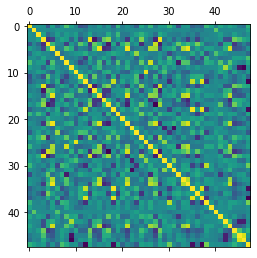

In [61]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

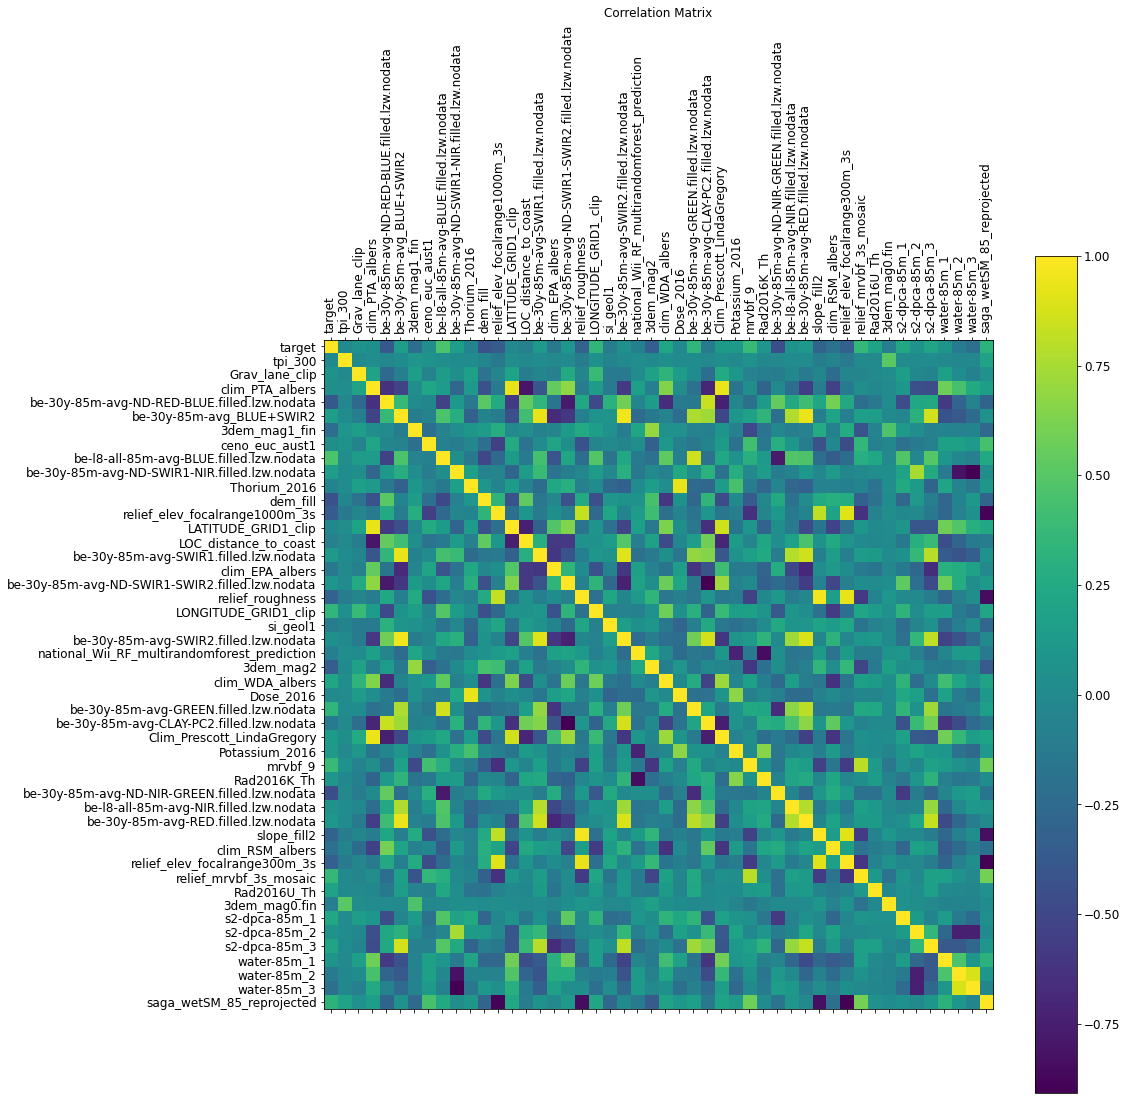

In [69]:
f = plt.figure(figsize=(15, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=12);